<a href="https://colab.research.google.com/github/Criiistiiian/Prueba1/blob/main/Calse%205-AU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

Paso 2
De datasets importamos el conjunto de datos de iris() y establecemos el número de vecino más cercano en 15

In [3]:

iris = datasets.load_iris()  # Creamos la variable para traer nuestro dataset
n_neighbors = 15

La librería Iris se encuentra separada en:

data que contiene todas las características.
target que contiene las clases asociadas a esas características.

In [4]:
X = iris.data[:,:2] # solo tomaremos los primeros 2 features, para ejemplificar.
print(X)
y = iris.target
print(y)


[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

Para analizar los datos visualmente crearemos un mapa de colores mediante ListedColormap a partir de una lista de colores, y utilizaremos un mallado con un paso de 0.2



In [7]:
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Paso 5
Ahora realizaremos dos clasificaciones, una para un peso uniforme y otra para un peso en función al inverso de la distancia.

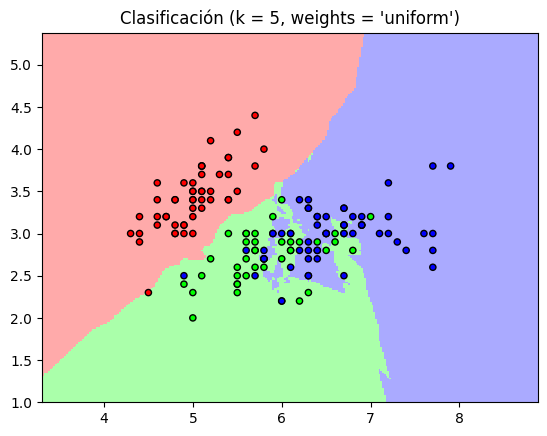

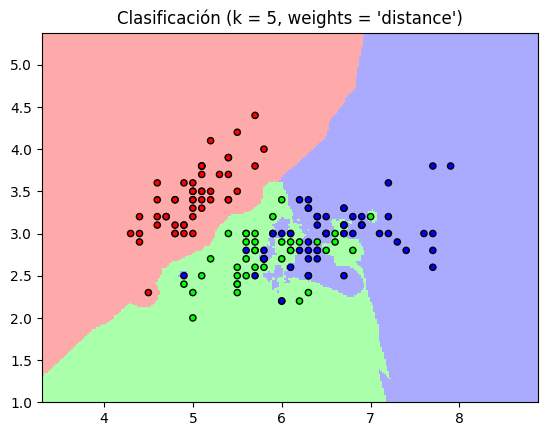

In [8]:
 n_neighbors = 5
for weights in ['uniform', 'distance']:
    # Creamos una instancia del clasificador de vecinos más cercanos y le pasamos los datos mediante fit().
    # El primer párametro de KNeighborsClassifier es con cuantos vecinos quiero clasificar y el
    # segundo el tipo de peso a utilizar.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Agregamos el resultado al gráfico
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

    # Ploteo los datos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()

In [17]:
#Ploteo un nuevo dato
Xn = np.array([[7.3,3], [5.1,2.9], [6.4,3.2]])
Yn = clf.predict(Xn)
print(Yn)


[2 0 1]


In [19]:
from sklearn import metrics
print("La exactitud por el metodo K-NN es:")
print("Por la funciona de metricas es:",metrics.accuracy_score(Yn, clf.predict(Xn)))
print("por la funcion score es:", clf.score(Xn, Yn))
print("la exactitud para los datos de entrenamiento es:", clf.score(X, y))

La exactitud por el metodo K-NN es:
Por la funciona de metricas es: 1.0
por la funcion score es: 1.0
la exactitud para los datos de entrenamiento es: 0.9266666666666666


Arboles de decisiones
Un árbol de decisiones se asemeja a las raíces de un árbol, en donde partimos de un conjunto de datos con determinadas características, que llamaremos raíz principal y que iremos descomponiendo por atributos, en ramas a partir de una determinada clasificación. Cada descomposición lleva asociada una condición que puede resultar verdadera o falsa y que se encuentra relacionada a una caracterización específica. Podríamos tener por ejemplo el atributo “tipo de vehículo” con valores:

Camionetas
Autos
Y el atributo “tracción”, con valores:

Cuatro ruedas
Dos ruedas
En base a estos atributos podríamos crear un árbol en el cual la primera división se realice por “tipo de vehículo” y luego por “tracción” o al revés. Esta división la realizaremos a partir de un algoritmo que optimice la forma en la cual se lleva a cabo la división en base a un análisis probabilístico. Cuanto más profundo es el árbol, más complejas son las reglas de decisión y más se ajusta el modelo

In [30]:
!pip install pydotplus

In [31]:
import numpy as np # para hacer calculas arimeticos
from sklearn.tree import DecisionTreeClassifier #datasets
from sklearn.datasets import load_iris # se carga el iris
from sklearn.model_selection import train_test_split # se dan valores de prueba y los separa en un array
from sklearn.tree import export_graphviz # exportamos cuestiones que tienen que ver con partes graficas
import graphviz
import matplotlib.pyplot as plt #representacion grafica de los datos
from matplotlib.colors import ListedColormap #representacion grafica de los datos.

In [32]:
iris=load_iris()


In [33]:
X = iris.data[:,:2] # solo tomaremos los primeros 2 features, para ejemplificar.
Y = iris.target

In [34]:
X_entrenamiento, X_test, y_entrenamiento, y_test=train_test_split(X, Y)


In [35]:
arbol=DecisionTreeClassifier(max_depth=3)


In [36]:
arbol.fit(X_entrenamiento, y_entrenamiento)


DecisionTreeClassifier(max_depth=3)

In [37]:
arbol.score(X_test, y_test)


0.7368421052631579

In [38]:
arbol.score(X_entrenamiento, y_entrenamiento)


0.8125

In [ ]:
# import os
# Usuarios de Windows:
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'


In [39]:
export_graphviz(arbol, out_file='arbol1.dot', class_names=iris.target_names,
                feature_names=iris.feature_names[:2], impurity=False, filled=True)

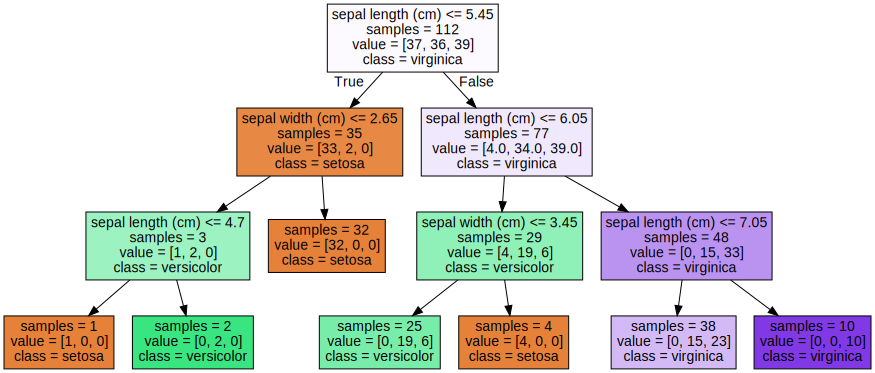

In [40]:
with open('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [24]:
from sklearn.tree import plot_tree


[Text(0.5, 0.875, 'x[0] <= 5.45\ngini = 0.666\nsamples = 112\nvalue = [36, 38, 38]'),
 Text(0.25, 0.625, 'x[1] <= 2.85\ngini = 0.267\nsamples = 39\nvalue = [33, 5, 1]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 4.7\ngini = 0.5\nsamples = 6\nvalue = [1, 4, 1]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.375, 0.375, 'x[0] <= 5.35\ngini = 0.059\nsamples = 33\nvalue = [32, 1, 0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.75, 0.625, 'x[0] <= 6.25\ngini = 0.537\nsamples = 73\nvalue = [3, 33, 37]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 3.6\ngini = 0.508\nsamples = 36\nvalue = [3, 23, 10]'),
 Text(0.5625, 0.125, 'gini = 0.422\nsamples = 33\nvalue = [0, 23, 10]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.875, 0.3

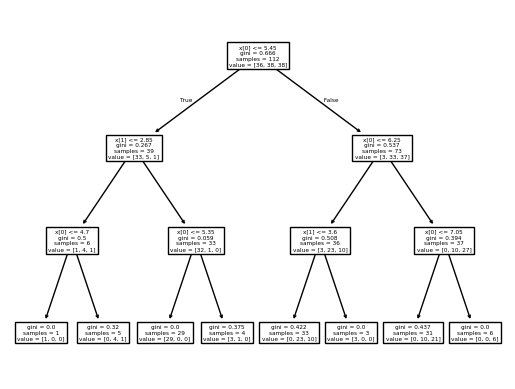

In [25]:
plot_tree(arbol)


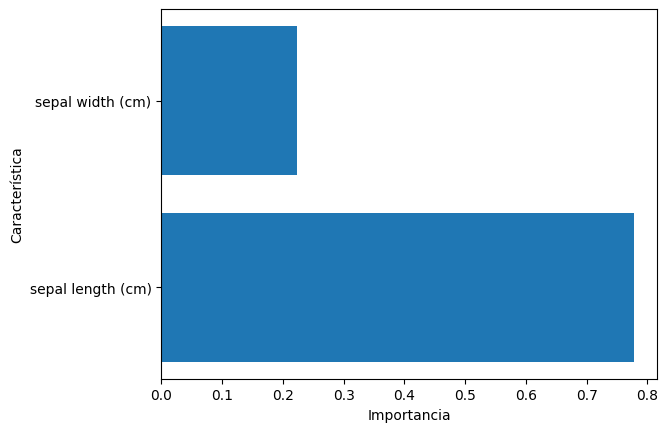

In [26]:
caracteristica=2

plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica),iris.feature_names[:2])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [28]:
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

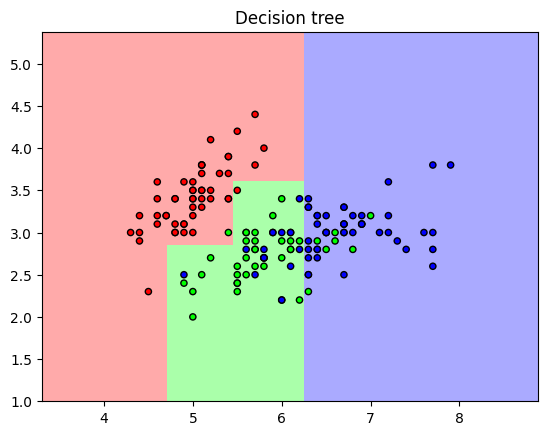

In [29]:

# Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = arbol.predict(np.c_[xx.ravel(), yy.ravel()])

# Agregamos el resultado al gráfico
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

# Ploteo los datos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision tree")

#Ploteo un nuevo dato
Xn = np.array([[7.3,3], [5.1,2.9], [6.4,3.2]])
Yn = arbol.predict(Xn)
#print(Yn)
plt.show()